<a href="https://colab.research.google.com/github/shubhamnawani99/stocks-analysis/blob/master/Module_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#5.1 importing libraries
import numpy as np
import pandas as pd
import matplotlib as plt

In [0]:
#loading the chosen stock
intel_path = "https://raw.githubusercontent.com/shubhamnawani99/stocks-analysis/master/INTC.csv"
intel = pd.read_csv(intel_path)
intel

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity
0,"Oct 24, 2019",52.23,52.11,52.42,51.44,25.65M
1,"Oct 23, 2019",51.72,51.37,51.96,51.20,15.96M
2,"Oct 22, 2019",52.01,51.90,52.32,51.89,13.35M
3,"Oct 21, 2019",52.13,51.52,52.17,51.34,13.12M
4,"Oct 18, 2019",51.36,51.75,51.82,51.03,16.98M
...,...,...,...,...,...,...
498,"Oct 31, 2017",45.49,45.20,45.80,44.65,47.00M
499,"Oct 30, 2017",44.37,44.48,45.19,43.88,48.16M
500,"Oct 27, 2017",44.40,43.30,45.00,43.10,90.03M
501,"Oct 26, 2017",41.35,40.91,41.58,40.71,38.25M


In [0]:
#Calculating Daily Return and mean daily return
intel['Daily Return'] = intel['Close Price'].pct_change()
intel = intel.dropna()

mean_daily_return = intel['Daily Return'].mean()
print("Mean Daily Return:",mean_daily_return)

std_daily_return = intel['Daily Return'].std()
print("Daily Standard Deviation of Returns:",std_daily_return)

Mean Daily Return: -0.00029539315244456876
Daily Standard Deviation of Returns: 0.019590583899316193


In [0]:
#Calc. annual mean
annual_mean = mean_daily_return * 252
print("Annual Mean:",annual_mean)

annual_stddev = std_daily_return * np.sqrt(252)
print("Annual Standard Deviation:",annual_stddev)

Annual Mean: -0.07443907441603133
Annual Standard Deviation: 0.3109908782168201 0.3109908782168201


In [0]:
#5.2 Importing 5 more stocks from different segments
p_hdfc = "https://raw.githubusercontent.com/shubhamnawani99/stocks-analysis/master/Large_Cap/HDFCBANK.csv"
p_pharma = "https://raw.githubusercontent.com/shubhamnawani99/stocks-analysis/master/Large_Cap/SUNPHARMA.csv"
p_steel = "https://raw.githubusercontent.com/shubhamnawani99/stocks-analysis/master/Mid_Cap/JINDALSTEL.csv"
p_voltas = "https://raw.githubusercontent.com/shubhamnawani99/stocks-analysis/master/Mid_Cap/VOLTAS.csv"
p_fortis = "https://raw.githubusercontent.com/shubhamnawani99/stocks-analysis/master/Small_Cap/FORTIS.csv"

hdfc = pd.read_csv(p_hdfc)
pharma = pd.read_csv(p_pharma)
steel = pd.read_csv(p_steel)
voltas = pd.read_csv(p_voltas)
fortis = pd.read_csv(p_fortis)

In [24]:
#combining into one dataframe
cols = ['HDFC','Pharma','Steel','Voltas','Fortis']
stocks = [hdfc, pharma, steel, voltas, fortis]
data =  pd.DataFrame(columns = cols)

data['HDFC'] = hdfc['Close Price']
data['Pharma'] = pharma['Close Price']
data['Steel'] = steel['Close Price']
data['Voltas'] = voltas['Close Price']
data['Fortis'] = fortis['Close Price']

print("Closing Prices of the 5 respective stocks")
data = data.dropna()
data

Closing Prices of the 5 respective stocks


,HDFC,Pharma,Steel,Voltas,Fortis
0,1553.40,654.45,114.20,431.85,205.25
1,1583.00,652.35,114.10,432.45,207.90
2,1559.65,650.90,116.40,430.20,205.90
3,1557.15,653.95,113.30,414.10,196.85
4,1600.00,653.15,112.15,415.75,203.55
...,...,...,...,...,...
489,1975.15,453.15,169.30,601.45,136.35
490,2004.30,448.20,170.15,576.65,135.20
491,2013.90,439.15,163.05,574.10,133.60
492,2012.45,439.35,163.25,580.05,133.00


In [25]:
#calculating portfolio returns and standard deviation
returns = data.pct_change()
mean_daily_returns = returns.mean()
mean_daily_returns = mean_daily_returns.values.reshape(5,1)
cov_matrix = returns.cov()
weights = np.asarray([0.2,0.2,0.2,0.2,0.2]) #weights of repective stocks
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)
portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)
print('Portfolio expected annualised return is {} and volatility is {}'.format(portfolio_return,portfolio_std_dev))

Portfolio expected annualised return is 0.35 and volatility is 0.2


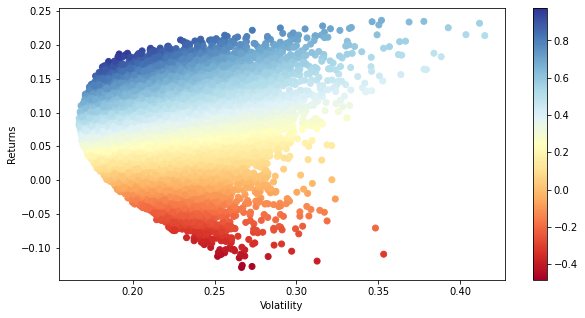

In [40]:
#5.3 Preparing a scatter plot
num_portfolios = 25000
plt.figure(figsize = (10,5))
results = np.zeros((3,num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(5)
    weights /= np.sum(weights)
    
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    
    results[2,i] = results[0,i] / results[1,i]    

results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])

plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()

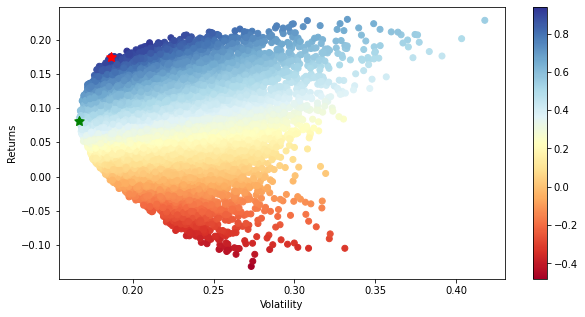

In [38]:
#5.4 Marking the scatter plot
plt.figure(figsize = (10,5))

max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()

plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=100)
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=100)